In [1]:
#Refrences

#datapack details
#SNEHAAN BHAWAL's Netflix Movie and TV Shows (June 2021), a dataset of 7000 Netflix Movies and TV shows for Recommendation system
#https://www.kaggle.com/datasets/snehaanbhawal/netflix-tv-shows-and-movie-list/data?select=netflix_list.csv

#code refrences
#Aditya Sharma's Beginner Tutorial: Recommender Systems in Python was a massive help for us to get started.
#https://www.datacamp.com/tutorial/recommender-systems-python

In [2]:
#TODO
#add Collaborative filtering (User-based Filtering)
#add Del 2
#pretty up "more info" part of rec_sys and other sys
#reflect

In [3]:
#DONE
#do Del 1
#added more complexity to Content-based filtering sys based on ratings
#add more info to recs; ep, runtime, lang?
#for Presentation (10p) explain terms like 'similarity calculation', 'pairwise similarity score', etc.
#EDA

In [4]:
#Data Preprocessing

#load data
import pandas
data = pandas.read_csv("netflix_list.csv")
#overview (kind of EDA but w/e)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       6995 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [5]:
#summary stats
#change object to float for .describe()
data[['startYear', 'episodes', 'runtime', 'rating']].describe()

,startYear,episodes,rating
count,6493.000000,2304.000000,6000.000000
mean,2015.606653,38.510851,6.696400
std,7.855886,237.894838,1.209824
min,1932.000000,1.000000,1.700000
25%,2015.000000,8.000000,6.000000
50%,2017.000000,14.000000,6.800000
75%,2019.000000,30.000000,7.600000
max,2022.000000,8358.000000,9.700000


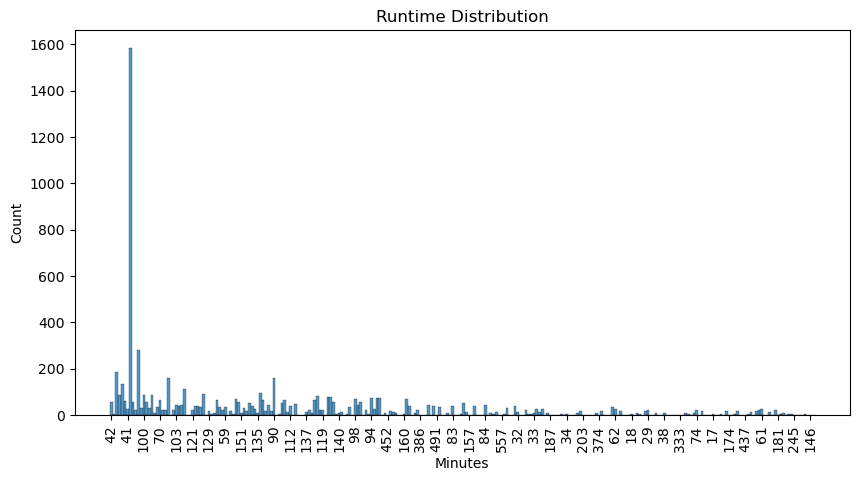

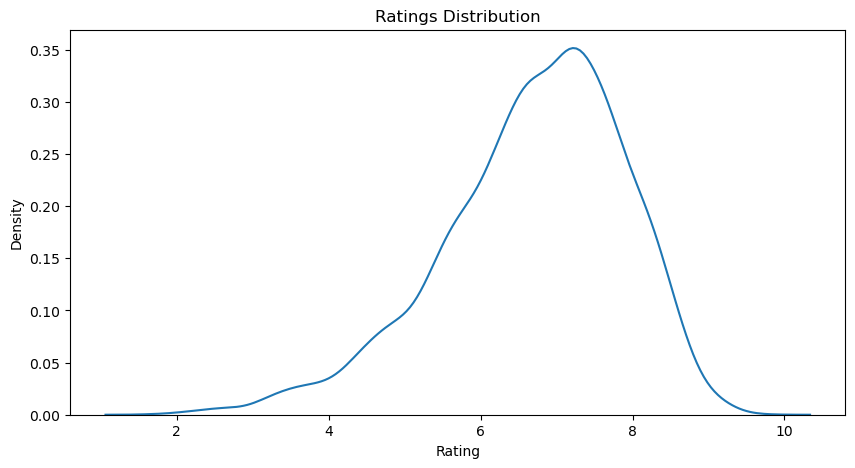

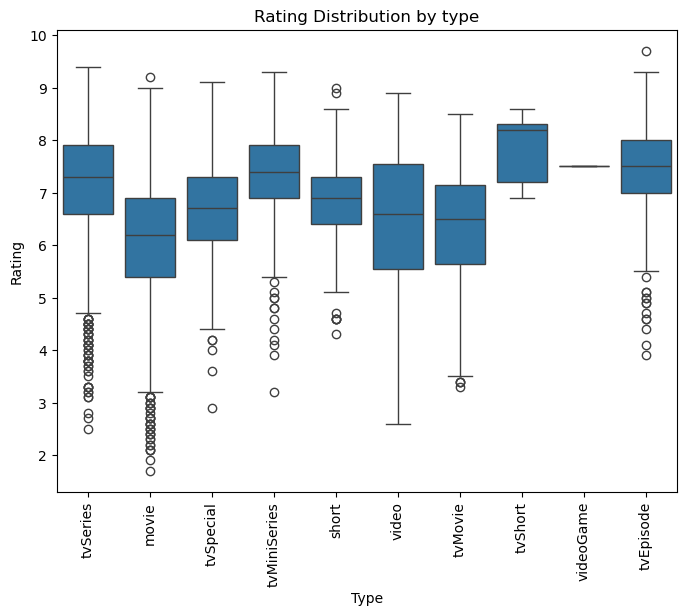

In [6]:
#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#runtime histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['runtime'])
plt.xlabel('Minutes')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::6])
plt.xticks(rotation='vertical')
plt.title('Runtime Distribution')
plt.show()

#rating distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(data['rating'])
plt.xlabel('Rating')
plt.title('Ratings Distribution')
plt.show()

#rating by movies/tv series, boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='rating', data = data)
plt.xlabel('Type')
plt.xticks(rotation='vertical')
plt.ylabel('Rating')
plt.title('Rating Distribution by type')
plt.show()

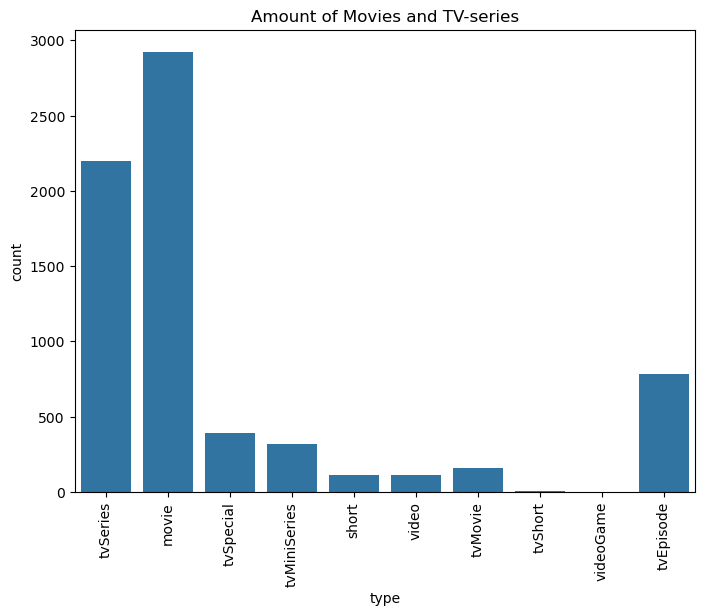

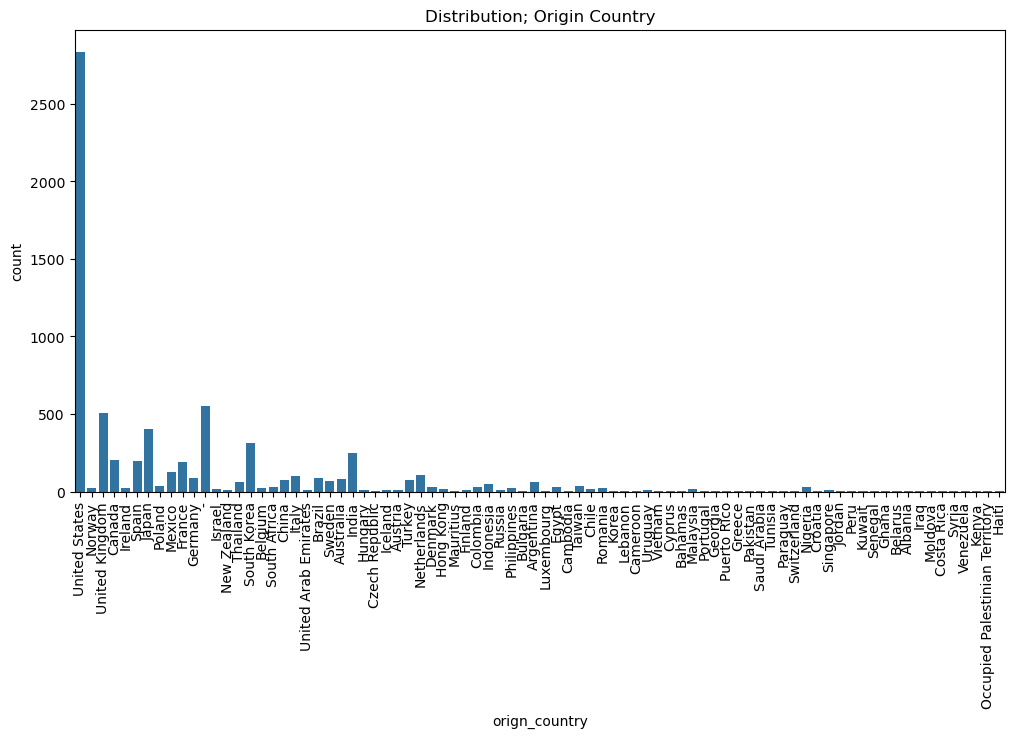

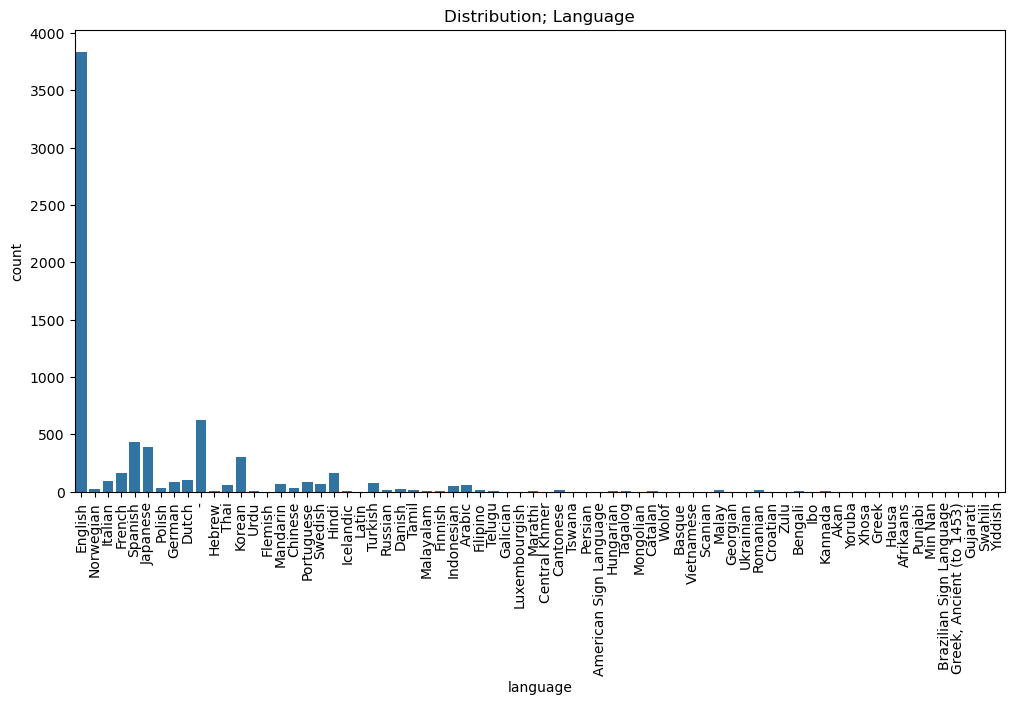

In [7]:
#movies/tv-series by type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.xticks(rotation='vertical')
plt.title('Amount of Movies and TV-series')
plt.show()

#item distribution by country
plt.figure(figsize=(12, 6))
sns.countplot(x='orign_country', data=data)
plt.xticks(rotation='vertical')
plt.title('Distribution; Origin Country')
plt.show()

#language
plt.figure(figsize=(12, 6))
sns.countplot(x='language', data=data)
plt.title('Distribution; Language')
plt.xticks(rotation='vertical')
plt.show()

In [8]:
#drop useless data, or data I can't be bothered to deal with
data.drop(['imdb_id', 'certificate', 'runtime', 'numVotes', 'isAdult', 'cast', 'image_url'], axis=1, inplace=True)
data.head()

,title,popular_rank,startYear,endYear,episodes,type,orign_country,language,plot,summary,rating,genres
0,Lucifer,1,2016.0,NaN,93.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,"Crime,Drama,Fantasy"
1,Army of the Dead,2,2021.0,NaN,NaN,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,"Action,Crime,Horror"
2,The Kominsky Method,3,2018.0,2021.0,22.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,"Comedy,Drama"
3,Friends,4,1994.0,2004.0,235.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,"Comedy,Romance"
4,Ragnarok,5,2020.0,NaN,12.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,"Action,Drama,Fantasy"


In [9]:
#fix missing values in list(s)
data.fillna({'plot': ''}, inplace=True)     #missing values replaced with empty string
data.fillna({'genres': ''}, inplace=True)
data.fillna({'rating': 0}, inplace=True)    #missing value replaced with 0
data.fillna({'episodes': 0}, inplace=True)
data.fillna({'endYear': 0}, inplace=True)   #should I leave as NaN to indicate series hasn't ended?

from sklearn.preprocessing import MinMaxScaler
#scale rating 0 - 1, TODO: give rating more weight
scaler = MinMaxScaler()
data['rating'] = scaler.fit_transform(data['rating'].values.reshape(-1, 1)) #ValueError: cannot reshape array of size 7008 into shape (0,1)
data.head()

,title,popular_rank,startYear,endYear,episodes,type,orign_country,language,plot,summary,rating,genres
0,Lucifer,1,2016.0,0.0,93.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",0.835052,"Crime,Drama,Fantasy"
1,Army of the Dead,2,2021.0,0.0,0.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",0.597938,"Action,Crime,Horror"
2,The Kominsky Method,3,2018.0,2021.0,22.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,0.845361,"Comedy,Drama"
3,Friends,4,1994.0,2004.0,235.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",0.917526,"Comedy,Romance"
4,Ragnarok,5,2020.0,0.0,12.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,0.773196,"Action,Drama,Fantasy"


In [10]:
#Term Frequency-Inverse Document Frequency Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
#remove stop words ((english) a, are, is, the)
tfidf_vec = TfidfVectorizer(stop_words='english')

#plot & genres data fitted/transformed into numerical features
tfidf_plot = tfidf_vec.fit_transform(data['plot'])
tfidf_genres = tfidf_vec.transform(data['genres'])

#plot and genres combined for complexity
#tfidf_combined = tfidf_plot + tfidf_genres #OLD

from scipy.sparse import hstack
#combine TF-IDF vectors and ratings for weight
tfidf_combined = hstack([tfidf_plot, tfidf_genres, data['rating'].values.reshape(-1, 1)])

In [11]:
#Similarity Calculation

from sklearn.metrics.pairwise import linear_kernel
#calc cosine similarity
cos = linear_kernel(tfidf_combined, tfidf_combined)

In [12]:
# Recommendation System

#func to recommend content
def rec_sys(title, cos=cos, num_rec = 5): #change num_rec to increase/lower suggestions
    #get index of title
    id = data[data['title']==title].index[0]

    #get pairwise similarity scores for all titles
    scores = list(enumerate(cos[id]))

    #sort titles based on similarity scores
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    #get x most similar titles except input title itself, titles index
    #scores = scores[1:num_rec + 1] #1:x, edit x -/+ to get less/more recommendations
    index = [i[0] for i in scores[1:num_rec + 1]] #sexy one row code

    #return similar titles, .tolist() can be added/removed
    recs = data.iloc[index] #add ['title'] infront of data for titles only

    return recs

In [13]:
#ONLY RUN THIS CELL ONLY OR YOU'LL MUCK THE DATA UP

#we want the ratings data to be more readable/standardized for conventional user
data['rating'] = scaler.inverse_transform(data['rating'].values.reshape(-1, 1)) #undo the reshape

In [14]:
#test rec sys
recs = rec_sys('Friends') #type movie/series title here, case sensitive
print(recs)

                             title popular_rank  startYear  endYear  episodes  \
2262                Melloga Chejil        2,278     2019.0      0.0      16.0   
48           How I Met Your Mother           49     2005.0   2014.0     208.0   
1862  Put Your Head on My Shoulder        1,874     2019.0   2019.0      24.0   
250                 That '70s Show          251     1998.0   2006.0     200.0   
1256          Yi Guyeokui Michin X        1,263     2021.0      0.0      13.0   

          type  orign_country  language  \
2262  tvSeries    South Korea    Korean   
48    tvSeries  United States   English   
1862  tvSeries          China  Mandarin   
250   tvSeries  United States   English   
1256  tvSeries    South Korea    Korean   

                                                   plot  \
2262  A romantic comedy that depicts the daily lives...   
48    A father recounts to his children - through a ...   
1862  Si Tu Mo's graduation is close and she's unsur...   
250   A comedy rev